In [1]:
import numpy as np

from matplotlib import pyplot as plt

In [3]:
class LagrangeInterpolation:

    def __init__(self, func, a, b, n):
        self.func = func
        self.segment = np.linspace(a, b, 100)
        self.equidistant_nodes = np.linspace(a, b, n)
        self.chebyshev_nodes = np.array([(a + b) / 2 + (a - b) / 2 * np.cos(np.pi * (2 * m + 1) / (2 * n)) for m in range(n)])
        self.function_values = func(self.segment)

    def interpolate(self, chebyshev=False):
        results = np.zeros_like(self.segment)
        nodes = self.chebyshev_nodes if chebyshev else self.equidistant_nodes

        for x_i, y_i in zip(nodes, self.func(nodes)):
            results += y_i * np.prod([(self.segment - x_j) / (x_i - x_j) for x_j in nodes if x_i != x_j], axis=0)

        return results

    def equidistant_abs_error(self):
        return abs(self.function_values - self.interpolate())

    def equidistant_max_error(self):
        return max(abs(self.function_values - self.interpolate()))

    def chebyshev_abs_error(self):
        return abs(self.function_values - self.interpolate(chebyshev=True))

    def chebyshev_max_error(self):
        return max(abs(self.function_values - self.interpolate(chebyshev=True)))

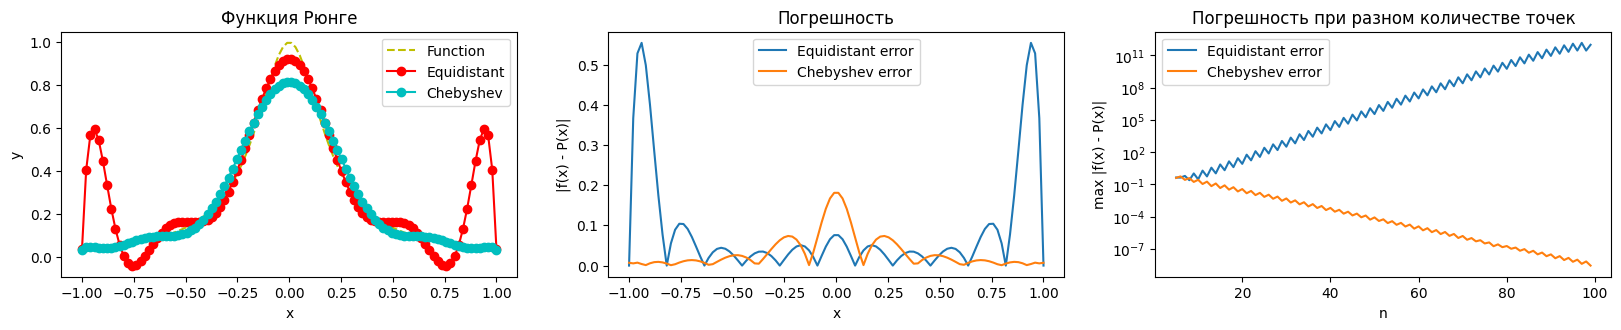

In [15]:
plt.figure(figsize=(20, 7))

plt.subplot(2, 3, 1)
interpolation = LagrangeInterpolation(
        func=lambda x: 1 / (25 * x ** 2 + 1), a=-1, b=1, n=12
)
plt.plot(
        interpolation.segment, interpolation.function_values, '--y',
        interpolation.segment, interpolation.interpolate(), '-or',
        interpolation.segment, interpolation.interpolate(chebyshev=True), '-oc'
    )
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Function', 'Equidistant', 'Chebyshev'])
plt.title('Функция Рюнге')

plt.subplot(2, 3, 2)
plt.plot(
    interpolation.segment, interpolation.equidistant_abs_error(),
    interpolation.segment, interpolation.chebyshev_abs_error(),
)
plt.xlabel('x')
plt.ylabel('|f(x) - P(x)|')
plt.legend(['Equidistant error', 'Chebyshev error'])
plt.title('Погрешность')

plt.subplot(2, 3, 3)
n_choices = list(range(5, 100))
equidistant_errors = []
chebyshev_errors = []
for n in n_choices:
    i = LagrangeInterpolation(
        func=lambda x: 1 / (25 * x ** 2 + 1), a=-1, b=1, n=n
    )
    equidistant_errors.append(i.equidistant_max_error())
    chebyshev_errors.append(i.chebyshev_max_error())
plt.plot(n_choices, equidistant_errors, n_choices, chebyshev_errors)
plt.yscale('log')
plt.legend(['Equidistant error', 'Chebyshev error'])
plt.xlabel('n')
plt.ylabel('max |f(x) - P(x)|')
plt.title('Погрешность при разном количестве точек')

plt.show()